# Artificial Intelligence Techniques in Software Engineering

### Data processing

In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv('Bug-Prediction-dataset/soft_def_1.csv')

In [3]:
df2 = pd.read_csv('Bug-Prediction-dataset/soft_def_2.csv')

In [4]:
df3 = pd.read_csv('Bug-Prediction-dataset/soft_def_JM1.csv')

In [5]:
frames = [df1,df2,df3]

In [6]:
data = pd.concat(frames)

In [7]:
data

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,1,0,6,0,15.0,15.0,44.0,19.0,9.0,False
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,0,0,3,0,16.0,8.0,31.0,16.0,7.0,False
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,0,3,0,16.0,12.0,46.0,26.0,11.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,18.0,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,...,13,0,2,0,10,15,30,22,7,False
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,...,5,0,2,0,12,8,19,11,3,False
10882,42.0,4.0,1.0,2.0,103.0,519.57,0.04,26.40,19.68,13716.72,...,29,1,10,0,18,15,59,44,7,False
10883,10.0,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,...,6,0,2,0,9,8,21,15,1,False


In [8]:
# Imputation -- converts non numeric to numeric

data = data.apply(pd.to_numeric, errors='coerce')
data= data.dropna()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12487 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                12487 non-null  float64
 1   v(g)               12487 non-null  float64
 2   ev(g)              12487 non-null  float64
 3   iv(g)              12487 non-null  float64
 4   n                  12487 non-null  float64
 5   v                  12487 non-null  float64
 6   l                  12487 non-null  float64
 7   d                  12487 non-null  float64
 8   i                  12487 non-null  float64
 9   e                  12487 non-null  float64
 10  b                  12487 non-null  float64
 11  t                  12487 non-null  float64
 12  lOCode             12487 non-null  int64  
 13  lOComment          12487 non-null  int64  
 14  lOBlank            12487 non-null  int64  
 15  locCodeAndComment  12487 non-null  int64  
 16  uniq_Op            124

In [10]:
data.isnull().values.any() #Gives false ie:No null value in dataset

False

In [11]:
data = data.fillna(value=False)

In [12]:
def evaluation_control(data):    
    evaluation = (data.n < 300) & (data.v < 1000 ) & (data.d < 50) & (data.e < 500000) & (data.t < 5000)
    data['complexityEvaluation'] = pd.DataFrame(evaluation)
    data['complexityEvaluation'] = [0 if evaluation == True else 1 for evaluation in data.complexityEvaluation]

In [13]:
evaluation_control(data)
data

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects,complexityEvaluation
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,1.2,1.2,1.2,1.2,1.4,False,0
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1.0,1.0,1.0,1.0,1.0,True,0
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,0,6,0,15.0,15.0,44.0,19.0,9.0,False,0
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,0,3,0,16.0,8.0,31.0,16.0,7.0,False,0
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,3,0,16.0,12.0,46.0,26.0,11.0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,18.0,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,...,0,2,0,10.0,15.0,30.0,22.0,7.0,False,0
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,...,0,2,0,12.0,8.0,19.0,11.0,3.0,False,0
10882,42.0,4.0,1.0,2.0,103.0,519.57,0.04,26.40,19.68,13716.72,...,1,10,0,18.0,15.0,59.0,44.0,7.0,False,0
10883,10.0,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,...,0,2,0,9.0,8.0,21.0,15.0,1.0,False,0


In [14]:
#Droping insignificant features to reduce complexity of our work

data = pd.DataFrame(data.drop(['ev(g)'],axis=1))
data = pd.DataFrame(data.drop(['iv(g)'],axis=1))
data = pd.DataFrame(data.drop(['b'],axis=1))
data = pd.DataFrame(data.drop(['branchCount'],axis=1))

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12487 entries, 0 to 10884
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loc                   12487 non-null  float64
 1   v(g)                  12487 non-null  float64
 2   n                     12487 non-null  float64
 3   v                     12487 non-null  float64
 4   l                     12487 non-null  float64
 5   d                     12487 non-null  float64
 6   i                     12487 non-null  float64
 7   e                     12487 non-null  float64
 8   t                     12487 non-null  float64
 9   lOCode                12487 non-null  int64  
 10  lOComment             12487 non-null  int64  
 11  lOBlank               12487 non-null  int64  
 12  locCodeAndComment     12487 non-null  int64  
 13  uniq_Op               12487 non-null  float64
 14  uniq_Opnd             12487 non-null  float64
 15  total_Op           

In [16]:
data.head()

,loc,v(g),n,v,l,d,i,e,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,defects,complexityEvaluation
0,1.1,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,2,2,2,2,1.2,1.2,1.2,1.2,False,0
1,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1.0,1.0,1.0,1.0,True,0
2,24.0,5.0,63.0,309.13,0.11,9.50,32.54,2936.77,163.15,1,0,6,0,15.0,15.0,44.0,19.0,False,0
3,20.0,4.0,47.0,215.49,0.06,16.00,13.47,3447.89,191.55,0,0,3,0,16.0,8.0,31.0,16.0,False,0
4,24.0,6.0,72.0,346.13,0.06,17.33,19.97,5999.58,333.31,0,0,3,0,16.0,12.0,46.0,26.0,False,0


In [17]:
data.tail()

,loc,v(g),n,v,l,d,i,e,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,defects,complexityEvaluation
10880,18.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,98.38,13,0,2,0,10.0,15.0,30.0,22.0,False,0
10881,9.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,59.43,5,0,2,0,12.0,8.0,19.0,11.0,False,0
10882,42.0,4.0,103.0,519.57,0.04,26.40,19.68,13716.72,762.04,29,1,10,0,18.0,15.0,59.0,44.0,False,0
10883,10.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,68.98,6,0,2,0,9.0,8.0,21.0,15.0,False,0
10884,19.0,3.0,58.0,272.63,0.09,11.57,23.56,3154.67,175.26,13,0,2,1,12.0,14.0,31.0,27.0,False,0


In [18]:
data.sample(10)

,loc,v(g),n,v,l,d,i,e,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,defects,complexityEvaluation
9516,11.0,1.0,19.0,70.31,0.29,3.43,20.51,241.06,13.39,6,0,3,0,6.0,7.0,11.0,8.0,False,0
5230,4.0,1.0,4.0,8.00,0.67,1.50,5.33,12.00,0.67,2,0,0,0,3.0,1.0,3.0,1.0,False,0
6924,8.0,2.0,22.0,88.00,0.10,9.90,8.89,871.20,48.40,4,0,2,0,11.0,5.0,13.0,9.0,False,0
9689,26.0,4.0,57.0,267.93,0.09,11.14,24.04,2985.45,165.86,13,1,10,0,12.0,14.0,31.0,26.0,False,0
10405,6.0,1.0,25.0,83.05,0.11,9.00,9.23,747.43,41.52,5,1,0,0,6.0,4.0,13.0,12.0,False,0
9471,32.0,3.0,113.0,570.02,0.09,11.74,48.56,6691.50,371.75,23,2,5,0,10.0,23.0,59.0,54.0,False,0
7887,14.0,2.0,34.0,144.43,0.18,5.45,26.48,787.80,43.77,8,1,2,0,8.0,11.0,19.0,15.0,False,0
757,39.0,8.0,119.0,645.73,0.05,20.87,30.94,13476.01,748.67,30,1,6,0,20.0,23.0,71.0,48.0,True,0
622,10.0,2.0,18.0,62.27,0.40,2.50,24.91,155.67,8.65,8,0,0,0,5.0,6.0,12.0,6.0,True,0
8289,132.0,24.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0.0,0.0,0.0,0.0,False,0


In [19]:
data.shape

(12487, 19)

In [20]:
data.describe()

,loc,v(g),n,v,l,d,i,e,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,complexityEvaluation
count,12487.000000,12487.000000,12487.000000,12487.000000,12487.000000,12487.000000,12487.000000,1.248700e+04,1.248700e+04,12487.000000,12487.000000,12487.000000,12487.000000,12487.000000,12487.000000,12487.000000,12487.000000,12487.000000
mean,39.870770,6.234900,115.837103,685.105044,0.135262,14.351481,30.106232,3.605491e+04,2.003051e+03,25.018019,3.293265,4.573797,0.922559,11.527156,17.466613,68.775735,47.155970,0.162969
std,73.000895,12.559012,244.323636,1895.961405,0.159355,18.393942,34.668830,4.096011e+05,2.275562e+04,56.746511,10.525105,10.324519,4.462294,9.923147,27.283407,147.816960,98.696849,0.369353
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,2.000000,15.000000,53.770000,0.040000,3.500000,12.275000,1.984850e+02,1.102500e+01,3.000000,0.000000,0.000000,0.000000,6.000000,5.000000,9.000000,6.000000,0.000000
50%,21.000000,3.000000,50.000000,225.140000,0.080000,9.390000,22.210000,2.172570e+03,1.207000e+02,12.000000,0.000000,2.000000,0.000000,11.000000,11.000000,30.000000,20.000000,0.000000
75%,44.000000,7.000000,122.000000,638.090000,0.160000,19.130000,37.515000,1.178909e+04,6.549500e+02,27.000000,2.000000,5.000000,0.000000,16.000000,21.000000,72.000000,49.000000,0.000000
max,3442.000000,470.000000,8441.000000,80843.080000,2.000000,418.200000,598.330000,3.107978e+07,1.726655e+06,2824.000000,344.000000,447.000000,225.000000,411.000000,1026.000000,5420.000000,3021.000000,1.000000


In [21]:
defect_true_false = data.groupby('defects')['n'].apply(lambda x: x.count())
print('False: ',defect_true_false[0])
print('True: ',defect_true_false[1])

False:  10258
True:  2229


In [22]:
data.corr()

,loc,v(g),n,v,l,d,i,e,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,defects,complexityEvaluation
loc,1.000000,0.818142,0.874426,0.892829,-0.283713,0.678781,0.499348,0.746096,0.746096,0.916912,0.545108,0.751185,0.167457,0.535864,0.749107,0.875292,0.858952,0.251386,0.495531
v(g),0.818142,1.000000,0.739655,0.766912,-0.256216,0.671498,0.320689,0.704602,0.704602,0.796091,0.367694,0.512449,0.170271,0.648975,0.699822,0.752270,0.706466,0.206779,0.415667
n,0.874426,0.739655,1.000000,0.984736,-0.250106,0.807731,0.658375,0.709440,0.709440,0.924266,0.562946,0.751082,0.234261,0.625613,0.840598,0.995690,0.989739,0.202511,0.610250
v,0.892829,0.766912,0.984736,1.000000,-0.206846,0.751982,0.608841,0.790060,0.790060,0.942102,0.547939,0.744928,0.228778,0.619880,0.855708,0.982228,0.972352,0.188885,0.528950
l,-0.283713,-0.256216,-0.250106,-0.206846,1.000000,-0.359168,-0.180198,-0.064421,-0.064421,-0.218207,-0.165956,-0.215939,-0.097194,-0.330112,-0.247101,-0.246429,-0.250659,-0.153104,-0.282076
d,0.678781,0.671498,0.807731,0.751982,-0.359168,1.000000,0.396810,0.571093,0.571093,0.747489,0.459873,0.595822,0.195209,0.755736,0.633244,0.815878,0.779887,0.161742,0.631765
i,0.499348,0.320689,0.658375,0.608841,-0.180198,0.396810,1.000000,0.209748,0.209748,0.547244,0.405733,0.539179,0.208616,0.407936,0.739771,0.629130,0.692525,0.188864,0.579988
e,0.746096,0.704602,0.709440,0.790060,-0.064421,0.571093,0.209748,1.000000,1.000000,0.801289,0.334426,0.554811,0.099830,0.475164,0.565311,0.729182,0.666511,0.086464,0.177868
t,0.746096,0.704602,0.709440,0.790060,-0.064421,0.571093,0.209748,1.000000,1.000000,0.801289,0.334426,0.554811,0.099830,0.475164,0.565311,0.729182,0.666511,0.086464,0.177868
lOCode,0.916912,0.796091,0.924266,0.942102,-0.218207,0.747489,0.547244,0.801289,0.801289,1.000000,0.456543,0.721198,0.203561,0.639408,0.811419,0.923354,0.910651,0.199180,0.512963


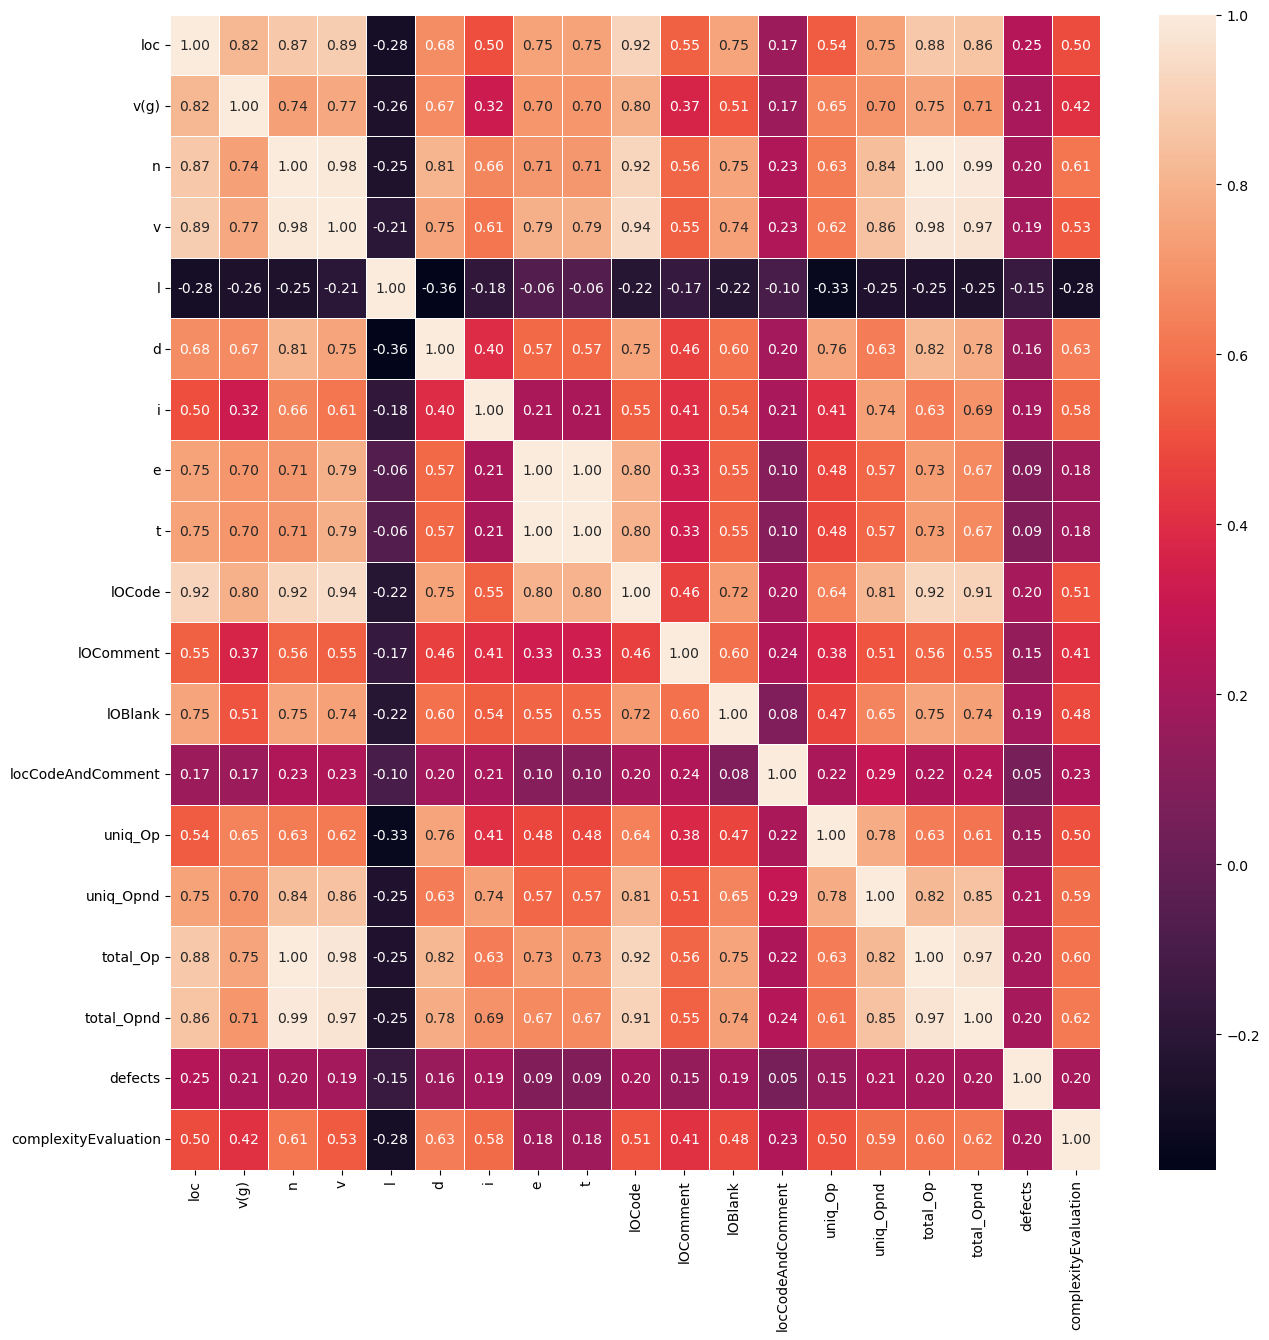

In [23]:
import matplotlib.pyplot as plt 
import seaborn as sns
f,ax = plt.subplots(figsize = (15, 15))
sns.heatmap(data.corr(), annot = True, linewidths = .5, fmt = '.2f')
plt.show()

In [24]:
data.isnull().sum()

loc                     0
v(g)                    0
n                       0
v                       0
l                       0
d                       0
i                       0
e                       0
t                       0
lOCode                  0
lOComment               0
lOBlank                 0
locCodeAndComment       0
uniq_Op                 0
uniq_Opnd               0
total_Op                0
total_Opnd              0
defects                 0
complexityEvaluation    0
dtype: int64

In [25]:
data.groupby("complexityEvaluation").size()

complexityEvaluation
0    10452
1     2035
dtype: int64

### feature selection

In [26]:
X = pd.DataFrame(data.drop(['defects'],axis=1))
Y = data['defects']
Y = pd.DataFrame(Y)


In [27]:
#now we resample, and from that we take training and validation sets
from imblearn.over_sampling import SMOTE


#sm = SMOTE(random_state=42, sampling_strategy=0.6)
oversample = SMOTE()
x,y = oversample.fit_resample(X,Y)
y = pd.DataFrame(y, columns=['defects'])
x= pd.DataFrame(x, columns=X.columns)

In [28]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20516 entries, 0 to 20515
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loc                   20516 non-null  float64
 1   v(g)                  20516 non-null  float64
 2   n                     20516 non-null  float64
 3   v                     20516 non-null  float64
 4   l                     20516 non-null  float64
 5   d                     20516 non-null  float64
 6   i                     20516 non-null  float64
 7   e                     20516 non-null  float64
 8   t                     20516 non-null  float64
 9   lOCode                20516 non-null  int64  
 10  lOComment             20516 non-null  int64  
 11  lOBlank               20516 non-null  int64  
 12  locCodeAndComment     20516 non-null  int64  
 13  uniq_Op               20516 non-null  float64
 14  uniq_Opnd             20516 non-null  float64
 15  total_Op           

In [29]:
y

,defects
0,False
1,True
2,False
3,False
4,False
...,...
20511,True
20512,True
20513,True
20514,True


### Preprocessing data

In [30]:
x1 = x.values # converting dataframes to numpy
y1= y.values

In [31]:
# Encoding the Dependent Variable
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y1)

C:\Users\sanjay\anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Dimensionality reduction

there are three popular dimensionality reduction techniques that are used. 

  1. Principal Component Analysis (PCA)
  2. Linear Discriminant Analysis (LDA), and
  3. Kernel PCA (KPCA)
  ----
  The PCA and LDA are applied in dimensionality reduction when we have a linear problem in hand that means there is a linear relationship between input and output variables. On the other hand, the Kernel PCA is applied when we have a nonlinear problem in hand that means there is a nonlinear relationship between input and output variables


In [33]:
len(X_train[0])

18

In [34]:
# Applying Dimensionality reduction


from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_


In [35]:
len(X_train[0])  # 18 features to 6 features

6

In [36]:
X_train.shape

(15387, 6)

### Defining and training models

In [37]:
def NN(X_train, y_train):

    X_train= pd.DataFrame(X_train)
    y_train= pd.DataFrame(y_train)   
    # Importing the Keras libraries and packages
    import keras
    from keras.models import Sequential
    from keras.layers import Dense
    
    model= Sequential([
    Dense(1000, activation='relu', input_shape=(6)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])


    # Compiling the ANN
    
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    # Fitting the ANN to the Training set
    model.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)
    
    
    
    return model

In [38]:
def knn(x_train,y_train):
  
  from sklearn.neighbors import KNeighborsClassifier
  neigh = KNeighborsClassifier
  clf = neigh(n_neighbors = 10)
  clf.fit(X_train, y_train)
  return clf

In [39]:
#Creation of Naive Bayes model
def naive_bayes(x_train, y_train): 
  from sklearn.naive_bayes import GaussianNB
  model = GaussianNB()
  model.fit(X_train, y_train)
  return model


In [40]:
def decision_tree(x_train, y_train):
  from sklearn import tree
  model = tree.DecisionTreeClassifier()
  model.fit(X_train, y_train)
  return model

In [41]:
def random_forest(x_train,y_train):
    from sklearn.ensemble import RandomForestClassifier
    clf = RandomForestClassifier(n_estimators=100, max_depth=5,random_state=0)
    clf.fit(x_train, y_train)
    return clf

In [42]:
def svm ( x_train,y_train):
    from sklearn.svm import SVC
    clf = SVC(gamma='auto')
    clf.fit(x_train, y_train)
    return clf

In [43]:
def cnn(x_train,y_train):
    from keras.models import Sequential
    from keras.layers import Dense,Dropout,Conv2D,Conv1D,Flatten,MaxPool2D    

    
    #img_rows, img_cols = 1,6
    
    #x_train1 = x_train_matrix.reshape(x_train.shape[0], img_rows, img_cols, 1)
    #x_val1 = x_val_matrix.reshape(x_val_matrix.shape[0], img_rows, img_cols, 1)
    #input_shape = (img_rows, img_cols, 1)

    model = Sequential()
    #add model layers
    model.add(Conv2D(64, kernel_size=1, activation='relu',input_shape=(None,6,)))
    model.add(Conv2D(32, kernel_size=1, activation='relu'))
    model.add(Conv2D(16, kernel_size=1, activation='relu'))
    
    
#   model.add(MaxPool2D(pool_size=(1,8)))
    #model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #compile model using accuracy to measure model performance
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    #train the model
    model.fit(x_train, y_train, epochs=40)    
    #y_pred = model.predict(x_val1)>0.5
    #y_pred_df = pd.DataFrame(y_pred)
    
    return model  

In [44]:
from keras.models import *
from keras.layers import *

def lstm(x_train, y_train):
  
  model = Sequential()

  model.add(LSTM(
          input_dim=6,
          units=100,
          return_sequences=True))
  model.add(Dropout(0.2))

  model.add(LSTM(
            units=50,
            return_sequences=False))
  model.add(Dropout(0.2))

  model.add(Dense(units=2, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(x_train,y_train)
  return model

### Training model

In [45]:
knn = knn(X_train,y_train)
nb = naive_bayes(X_train,y_train)
dt = decision_tree(X_train,y_train)
rf = random_forest(X_train,y_train)
svm= svm(X_train,y_train)


### Performance Check

In [46]:
from sklearn.metrics import *

def performance(model):
  print(model)
  print("\n----------------------------------------------\n")

  y_pred_on_test = model.predict(X_test)

  #print('Accuracy:',accuracy_score(y_test,y_pred_on_test))
  print('Accuracy:',balanced_accuracy_score(y_test,y_pred_on_test))
  print('Avg Precision:', average_precision_score(y_test,y_pred_on_test))
  print('f1_score:', f1_score(y_test,y_pred_on_test))
  print('Precision:', precision_score(y_test,y_pred_on_test))
  print('Recall:', recall_score(y_test, y_pred_on_test))
  print('ROC_AUC:',roc_auc_score(y_test,y_pred_on_test))

  print("\n========================================\n\n")

In [47]:
for i in [knn,nb,dt,rf, svm]:
  performance(i)

KNeighborsClassifier(n_neighbors=10)

----------------------------------------------

Accuracy: 0.7252360796708252
Avg Precision: 0.6672509111243546
f1_score: 0.7286732139418447
Precision: 0.7271329746348962
Recall: 0.7302199922809726
ROC_AUC: 0.725236079670825



GaussianNB()

----------------------------------------------

Accuracy: 0.5871098933417762
Avg Precision: 0.5681093681284827
f1_score: 0.40457589285714285
Precision: 0.730110775427996
Recall: 0.27981474334233886
ROC_AUC: 0.5871098933417762



DecisionTreeClassifier()

----------------------------------------------

Accuracy: 0.7292406672913665
Avg Precision: 0.6720731921578378
f1_score: 0.7298191013421513
Precision: 0.735686274509804
Recall: 0.7240447703589348
ROC_AUC: 0.7292406672913665



RandomForestClassifier(max_depth=5, random_state=0)

----------------------------------------------

Accuracy: 0.6694378978697857
Avg Precision: 0.6211856574830166
f1_score: 0.6547376982513217
Precision: 0.6918779544477869
Recall: 0.621381

### Extracting software features

In [48]:
#pip install radon

In [49]:
 features = [ "LOC","cyclomatic complexity", "Lenght n","Volume v","Program lenght l","Difficulty d","Intelligence i","Efforts e", "Time t","IOCODE", "IOCOmment","IOBlank","IOCodeAndComment","uniq op","uniq opnd","total op","total Opnd","evaluation" ]

In [50]:
def helper(n,v,d,e,t):    
    evaluation = (n < 300) & (v < 1000 ) & (d < 50) & (e < 500000) & (t < 5000)
    
    return 0 if evaluation == True else 1 

In [51]:
pwd

'C:\\Users\\sanjay\\AI-Software-Engineering'

In [52]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 48B3-D011

 Directory of C:\Users\sanjay\AI-Software-Engineering

06/30/2023  01:12 PM    <DIR>          .
06/30/2023  01:12 PM    <DIR>          ..
06/14/2023  01:12 PM    <DIR>          .ipynb_checkpoints
06/30/2023  01:12 PM           458,869 AI-SE-Model.ipynb
06/14/2023  01:12 PM    <DIR>          Bug-Prediction-dataset
06/14/2023  01:12 PM    <DIR>          Insights
06/30/2023  01:03 PM    <DIR>          test
               1 File(s)        458,869 bytes
               6 Dir(s)  102,014,763,008 bytes free


In [ ]:
from radon.raw import analyze
from radon.metrics import *
from radon.complexity import cc_visit
from radon.cli.tools import iter_filenames

module_features=[]


file_name = []
# iter through filenames starting from the current directory
# you can pass ignore or exclude patterns here (as strings)
# for example: ignore='tests,docs'
for filename in iter_filenames(['.']):
    with open(filename, encoding="utf-8") as fobj:
        source = fobj.read()
    #printing code
    #print(source)

    file_name.append(filename)

    # get cc blocks
    
    # get MI score
    #mi = mi_visit(source, True)
    # get raw metrics

    # Module(loc=13, lloc=5, sloc=4, comments=1, multi=5, blank=3, single_comments=1)
    raw = analyze(source)

    f1 = raw.loc #1
    f13 = raw.sloc #IOCODE
    f14 = raw.comments # IOComment
    f15 = raw.blank #IOBlank
    f16 = raw.lloc #IOcode and Comment


    #Halstead features
    ast = h_visit(source)
    hal = ast.total
    #Halstead(total=HalsteadReport(h1=1, h2=4, N1=2, N2=4, vocabulary=5, length=6, calculated_length=8.0, volume=13.931568569324174, difficulty=0.5, effort=6.965784284662087, time=0.3869880158145604, bugs=0.004643856189774725), functions=[])

    f17 = hal.h1 #Uniq op
    f18 = hal.h2 #uniq operands
    f19 = hal.N1 #toal operators
    f20 = hal.N2 #total operands

    f5 = hal.length #n
    f6 = hal.volume #v

    try:
         f7 = f6/f5
    except ZeroDivisionError:
        f7 = 0
    #f7 = f6/f5 #l --> program length
    f8 = hal.difficulty
    f9 = f7*f6
    f10 = hal.effort
    f12 = hal.time

    #cc
    cc = cc_visit(source)

    try:f2 = cc[-1].complexity
    except: f2 = 0
    f21 = helper(f5,f6,f8,f10,f12)
    

    f = [f1,f2,f5,f6,f7,f8,f9,f10,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21]

    #f3,f4, f11,f21 missing --> essential complexity , design complexity , b, branch count
    
    print("\n-------------------------------------------\n")
    print(filename,end="\n")
    for i,j in zip(features,f):
      print(str(i)+ " "+ str(j),end="\n")
   
    print("\n############################################\n")

    
    module_features.append(f)    
    

In [ ]:
module_features

In [ ]:
len(module_features[0])

In [ ]:
file_name

In [ ]:
def predict( list1, file_name,model=rf):
    # Feature Scaling
  from sklearn.preprocessing import StandardScaler
  
  list1 = np.array(list1)
  list1 = sc.transform(list1)

  #x_test = sc.transform(list) 

  X_test = pca.transform(list1)

  prediction = model.predict(X_test)
  for p,f in zip(prediction,file_name):
    if p== 0:
      print("\n",f, "  is Non buggy\n")
    else:
      print(f," is More likely to be buggy. Needs recheck ")

    #print("\nProbability values are :  \n",rf.predict_proba(X_test))

In [ ]:
predict(module_features,file_name)